<div>
    <img src='../../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../../pics/python-programming.png'/>
    <img src='../../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

<h1>Numpy</h1>

**Imports**

In [33]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from os import path
from os import system as sys
from pathlib import Path

**Global variables**

In [34]:
relativeImgPath = "../../pics"
relativeCsvPath = "../../csv"

In [35]:
matrix = [ [0, 0], [1, 1] ]
len(matrix)
matrix[1][1]

f"{'Numerical'[:3]}{'Python'[:2]}" 

'NumPy'

**Gebruik de numpy methode <i>flip</i> voor het spiegelen van een image**

<h2>Opdracht 1</h2>
<ol>
    <li>Spiegel pImg over de hortizontale as en ken de resulterende afbeelding toe aan variabele <u>bImg</u></li>
    <li>Spiegel qImg over de hortizontale as en ken de resulterende afbeelding toe aan variabele <u>dImg</u></li>
    <li>Geef bImg en dImg naast elkaar weer op de lege plaatsen in het raster</li>    
</ol>

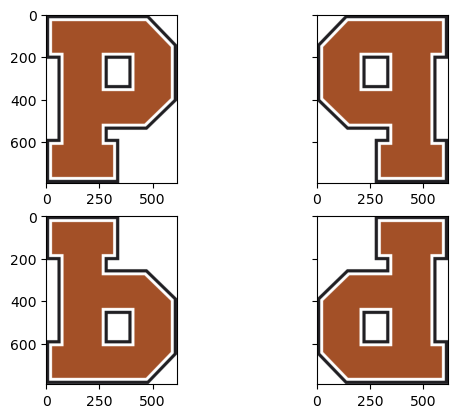

In [36]:
pImg = cv2.imread(path.join(relativeImgPath, "letter_p.png"))

# Maak een raster voor 4 images
fig, axs = plt.subplots(2, 2, sharey=True)
             
axs[0][0].imshow(pImg)

# Spiegel over de verticale as
qImg = np.flip(pImg, axis=1)
axs[0][1].imshow(qImg)

# Oplossing

# Spiegel over de verticale as
bImg = np.flip(pImg, axis=0)
axs[1][0].imshow(bImg)

# Spiegel over de verticale as
dImg = np.flip(qImg, axis=0)
axs[1][1].imshow(dImg)

<h2>Opdracht 2</h2>

<h3>Gegeven</h3>

Planeet | Grootte to.v. de omvang van de Aarde
---|---
Jupiter | 1120%
Saturnus | 945%
Uranus | 400%
Neptunus | 388%
Aarde| 100%
Venus | 95%
Mars | 53%
Mercury | 33%

In [37]:
filename = path.join(relativeCsvPath, "planets.csv")

<span style="color:yellow"><note>Het originele csv-bestand heeft spaties in kolomnamen, die gaan we eerst verwijderen</note></span>

In [46]:
cleanCsv = filename.replace('.csv', '_clean.csv')
sys(f"cat {filename} | sed 's/\\s*//g'")

Name,Diameter,Mass,Inclination,Eccentricity,Semi_majorAxis,SurfaceGravity,OrbitalPeriod,SiderealRotation,Satellites,DistanceToSun,Type
Mercury,4879.4,3.302×10^23,7.004,0.20563593,0.38709927,3.7,0.241,58.65,0,0.39,terrestrial
Venus,12103.6,4.869×10^24,3.39471,0.00677672,0.72333566,8.87,0.615,243.0187,0,0.723,terrestrial
Earth,12756.3,5.974×10^24,0.00005,0.01671123,1.00000261,9.78,1,0.997271,1,1.0,terrestrial
Mars,6794.4,6.419×10^23,1.85061,0.0933941,1.52371034,3.71,1.881,1.02595,2,1.524,terrestrial
Jupiter,142984,1.899×10^27,1.3053,0.04838624,5.202887,24.79,11.86,0.4135,63,5.203,jovian
Saturn,120536,5.688×10^26,2.48446,0.05386179,9.53667594,8.96,29.46,0.4264,64,9.539,jovian
Uranus,51118,8.683×10^25,0.774,0.04725744,19.18916464,7.77,84.01,0.7181,27,19.18,jovian
Neptune,49572,1.024×10^26,1.76917,0.00859048,30.06992276,11,164.79,0.6712,14,30.06,jovian


0

In [38]:
cleanCsv = filename.replace('.csv', '_clean.csv')
sys(f"cat {filename} | sed 's/\\s*//g'> {cleanCsv}")

0

<h3>Gevraagd</h3>
<p>
Schaal voor elke (erkende) planeet uit ons zonnestelsel de bijbehorende image t.o.v. van de aarde. Het geschaalde plaatje moet groter zijn dan het plaatje van de aarde als de bijbehorende planeet groter is dan de aarde. Is de planeet kleiner dan de aarde dan moet het nieuwe plaatje kleiner zijn. Gebruik voor de schaalfactor het percentage. 
<br>Tip: Indien nodig kun je de images normaliseren door eerst het plaatje van de aarde naar de gete schalen.
</p>

<h3>Oplossing</h3>
<ol>
    <li>
        <strong>Open het bestand csv/planets.csv en voeg daar de kolom <i>image</i> aan toe</strong>
    </li>
    <li>
        <strong>Importeer het csv-bestand en sla de data op in een dictionary</strong>
    </li>
    <li>
        <strong>Open een image uit de dictionary</strong>
    </li>
    <li>
        <strong>Schaal de image m.b.v. een <i>numpy array</i></strong>
    </li>
    <li>
        <strong>Sla de geschaalde image op</strong>
    </li>
    <li>
        <strong>Schrijf een functie voor het schalen van een image</strong>
    </li>    
    <li>
        <strong>Maak een loop waarbij voor elke planeet een geschaalde image wordt gemaakt en opgelagen</strong>
    </li>    
</ol>    

**Stap 1: Open het bestand csv/planets.csv en voeg daar de kolom <i>image</i> aan toe**

<p>Deze stap mag <u>handmatig</u> bijv. met Edit CSV in VSCode of

m.b.v. <u>pandas</u></p>

In [39]:
planetDataFrame = pd.read_csv(cleanCsv, header = 0, sep = ',')

# Voeg een nieuwe kolom toe aan het einde
nrOfCols = planetDataFrame.shape[1]
tempValues = nrOfCols * ""
planetDataFrame.insert(loc=nrOfCols, column='Image', value=tempValues)
planetDataFrame.to_csv(cleanCsv)

In [28]:
planetDataFrame.head

<bound method NDFrame.head of    Unnamed: 0     Name  Diameter         Mass  Inclination  Eccentricity  \
0           0  Mercury    4879.4  3.302×10^23      7.00400      0.205636   
1           1    Venus   12103.6  4.869×10^24      3.39471      0.006777   
2           2    Earth   12756.3  5.974×10^24      0.00005      0.016711   
3           3     Mars    6794.4  6.419×10^23      1.85061      0.093394   
4           4  Jupiter  142984.0  1.899×10^27      1.30530      0.048386   
5           5   Saturn  120536.0  5.688×10^26      2.48446      0.053862   
6           6   Uranus   51118.0  8.683×10^25      0.77400      0.047257   
7           7  Neptune   49572.0  1.024×10^26      1.76917      0.008590   

   Semi_majorAxis  SurfaceGravity  OrbitalPeriod  SiderealRotation  \
0        0.387099            3.70          0.241         58.650000   
1        0.723336            8.87          0.615        243.018700   
2        1.000003            9.78          1.000          0.997271   
3    

**Stap 2: Importeer het csv-bestand en sla de data op in een dictionary**

In [20]:
planetDataFrame = pd.read_csv(cleanCsv, header = 0, sep = ',')
planetDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8 non-null      int64  
 1   Name              8 non-null      object 
 2   Diameter          8 non-null      float64
 3   Mass              8 non-null      object 
 4   Inclination       8 non-null      float64
 5   Eccentricity      8 non-null      float64
 6   Semi_majorAxis    8 non-null      float64
 7   SurfaceGravity    8 non-null      float64
 8   OrbitalPeriod     8 non-null      float64
 9   SiderealRotation  8 non-null      float64
 10  Satellites        8 non-null      int64  
 11  DistanceToSun     8 non-null      float64
 12  Type              8 non-null      object 
 13  Image             0 non-null      float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.0+ KB


**Stap 3: Open een image van een item uit de dictionary**

In [21]:
img = Image.open(path.join(relativeImgPath, "mercury.jpg"))
type(img)

PIL.JpegImagePlugin.JpegImageFile

**Stap 4: Schaal de image m.b.v. een numpy array**

Original shape : (240, 320, 3)
Shape of scaled image : (79, 106, 3)


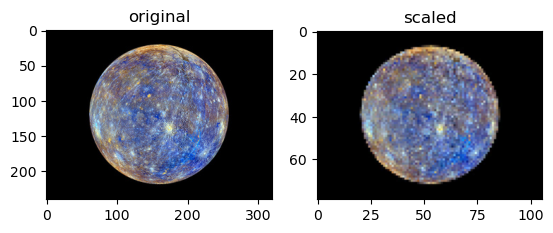

In [22]:
# Van Image naar Numpy array
array = np.array(img)
type(array)

# 33% volgens bovenstaande tabel
scaleFactor = 0.33
scaleArray = ndimage.zoom(array, (scaleFactor, scaleFactor, 1))

# Van Numpy array naar Image
imgScaled = Image.fromarray(scaleArray)

print( f"Original shape : {array.shape}" )
print( f"Shape of scaled image : {scaleArray.shape}" )

# Plot de plaatjes naast elkaar
fig, axs = plt.subplots(1, 2)
             
axs[0].set_title("original")
axs[0].imshow(img)
axs[1].set_title("scaled")
axs[1].imshow(imgScaled)

**Stap 5: Sla de geschaalde image op**

In [23]:
imgScaled.save(img.filename.replace(".jpg","_scaled.jpg"))

**Stap 6: Schrijf een functie voor het schalen van een image**

In [24]:
# Oplossing

# Input: PIL.Image
# Output: PIL.Image
def scaleImage(img, scaleFactor):
    # Snel thuiS!
    if scaleFactor==1: 
        return img    
    
    array = np.array(img)   
    scaleArray = ndimage.zoom(array, (scaleFactor, scaleFactor, 1))

    return Image.fromarray(scaleArray)

0.5326309353025563


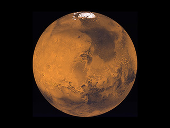

In [25]:
# Test de functie

# Voorbeeld met Mars
diameterMars = float(planetDataFrame[(planetDataFrame["Name"]=="Mars")]["Diameter"])
imgFileMars  = Path(relativeImgPath, "mars").with_suffix(".jpg")

# Normaliseer t.o.v. de Aarde
diameterEarth = float(planetDataFrame[(planetDataFrame["Name"]=="Earth")]["Diameter"])

# Voorkom delen door nul!
scaleFactor = (diameterMars / diameterEarth) if diameterEarth>0 else 1
print(scaleFactor)

scaleImage(Image.open(imgFileMars), scaleFactor)

**Stap 7: Maak een loop waarbij voor elke planeet een geschaalde image wordt gemaakt en opgelagen**

Planet Mercury is approximately 38% the size of Earth


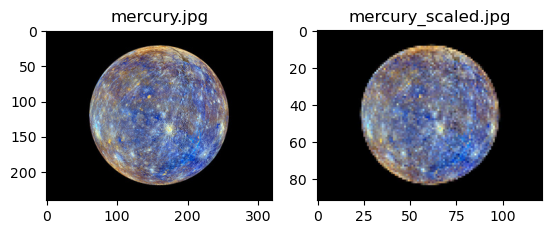

Planet Venus is approximately 95% the size of Earth


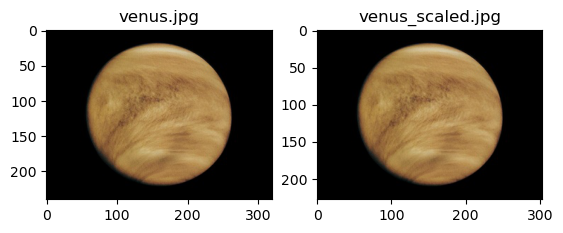

Planet Mars is approximately 53% the size of Earth


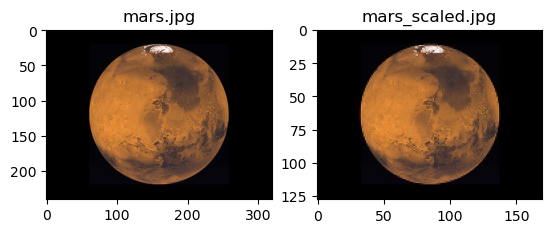

Planet Jupiter is approximately 1121% the size of Earth


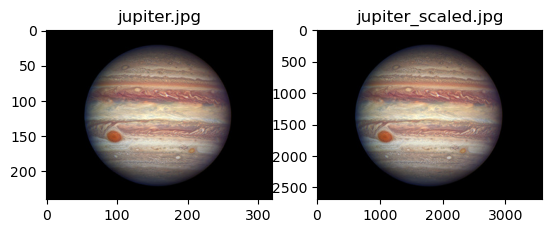

Planet Saturn is approximately 945% the size of Earth


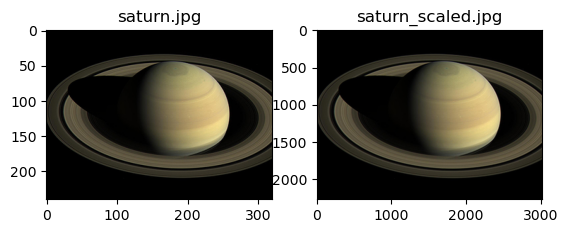

Planet Uranus is approximately 401% the size of Earth


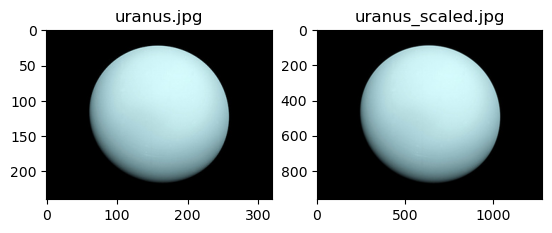

Planet Neptune is approximately 389% the size of Earth


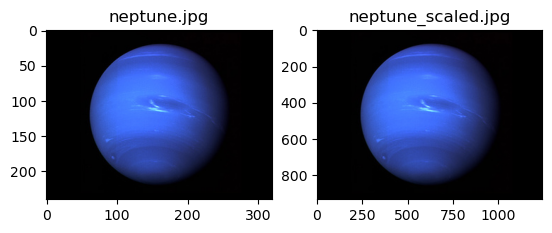

In [26]:
ext = ".jpg"
diameterEarth = float(planetDataFrame[(planetDataFrame["Name"]=="Earth")]["Diameter"])

# Maak een lijst voor de paden naar de geschaalde images
imgList = list()


# Maak tuples van naam en diameter
planetDiameters = list(zip(planetDataFrame["Name"], planetDataFrame["Diameter"]))

for i, (planetName, diameter) in enumerate(planetDiameters):
    imgFilePath = Path(relativeImgPath, planetName.lower()).with_suffix(ext)
    img = Image.open(imgFilePath)
    
    # Voorkom delen door nul!
    scaleFactor = (diameter / diameterEarth) if diameterEarth>0 else 1
    
    if scaleFactor !=1 :    
        imgScaled = scaleImage(img, scaleFactor)        

        # Percentage
        perc = round(scaleFactor * 100)
        print( f"Planet {planetName} is approximately {perc}% the size of Earth" )    

        # Sla het geschaalde plaatje op onder een andere naam
        scaledImgFilePath = Path(relativeImgPath, f"{planetName.lower()}_scaled").with_suffix(ext)
        imgScaled.save(scaledImgFilePath)      

        # Voeg het pad toe aan de lijst
        imgList.append(scaledImgFilePath)

        # Maak een raster voor de images
        fig, axs = plt.subplots(1, 2)

        # Geef de plaatjes weer in het raster
        axs[0].imshow(img)
        axs[0].set_title(path.basename(imgFilePath))
        axs[1].imshow(imgScaled)
        axs[1].set_title(path.basename(scaledImgFilePath))
    
    else:
        # Voeg het pad toe aan de lijst
        imgList.append(imgFilePath)

    
    plt.show()

# Voeg de lijst met plaatjes toe als kolom
planetDataFrame["Image"] = imgList

# Sla het nieuwe DataFrame op in de CSV
planetDataFrame.to_csv(cleanCsv)